This curriculum is copied from [Melanie Walsh's *Introduction to Cultural Analytics & Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/05-Text-Analysis/09-Topic-Modeling-Without-Mallet.html). However, the dataset is different. This script uses the U.S. Inaugural Addresses corpus, which is available for download [here](https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/64e2547e2d86c20cc2a74f660143cfeb/US_Inaugural_Addresses.zip). 

We also use `NLTK` instead of using `little_mallet_wrapper` to clean and normalize our text

# Topic Modeling — With Tomotopy

In this workshop, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or single text that has been separated into smaller text chunks.

In this particular lesson, we're going to use [Tomotopy](https://github.com/bab2min/tomotopy) to topic model The U.S. Inaugural Addresses [zip file (.zip) of text files (.txt)](https://melaniewalsh.github.io/Intro-Cultural-Analytics/_downloads/64e2547e2d86c20cc2a74f660143cfeb/US_Inaugural_Addresses.zip) contains U.S. Inaugural Addresses ranging from President George Washington (1789) to President Donald Trump (2017). Each text file is titled with a number, the corresponding last name of the U.S. President, and the corresponding year of the Inaugural Address..

Tomotopy is a topic modeling tool that is written purely in Python.

___

## Install Packages

In [37]:
# !pip install tomotopy

We’re also going to pip install the data visualization library seaborn:

In [38]:
# !pip install seaborn

## Import Packages

Now let's import `tomotopy` and the data viz library `seaborn`.

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

Finally, we will also import `pandas` to organize our data and `NLTK` to clean and normalize our text

In [39]:
import tomotopy as tp
import seaborn
import glob
from pathlib import Path
import pandas as pd
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english')

## Get Training Data From Text Files

Before we topic model the US Innaugural Address files, we need to process the text files and prepare them for analysis. The steps below demonstrate how to process texts if your corpus is a collection of separate text files. 

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
    
<p class="title">Note</p>
    
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
</div>

To get the necessary text files, we're going to make a variable and assign it the file path for the directory that contains the text files.

</br>

*Note: make sure to save your files in the same folder as your Jupyter Notebook!*

In [40]:
directory = "US_Inaugural_Addresses"

Then we're going to use the `glob.gob()` function to make a list of all (`*`) the `.txt` files in that directory.

In [41]:
files = glob.glob(f"{directory}/*.txt")

Next we process our texts with the function `little_mallet_wrapper.process_string()`.

This function will take every individual text file, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

In [42]:
training_data = []
original_texts = []
titles = []

for file in files:
    text = open(file, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalpha()]
    text_stops = [t for t in text_lower if t not in stops]
    text_string = ' '.join(text_stops)
    training_data.append(text_string)
    original_texts.append(text)
    titles.append(Path(file).stem)

In [43]:
len(training_data), len(original_texts), len(titles)

(58, 58, 58)

## Train Topic Model

In [44]:
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after removing white space (strip) 
# and splitting it up into words (split)
for text in training_data:
    model.add_doc(text.strip().split())
    
# The log-likelihood function is typically used to 
# derive the maximum likelihood estimator of the parameter  
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
    

print("\nTopic Model Results:\n\n")
# Print out top 10 words for each topic
topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")

Topic Model Training...


Iteration: 0	Log-likelihood: -9.226721832798873
Iteration: 10	Log-likelihood: -8.988540895676218
Iteration: 20	Log-likelihood: -8.899690821615728
Iteration: 30	Log-likelihood: -8.839041586911307
Iteration: 40	Log-likelihood: -8.815554778321204
Iteration: 50	Log-likelihood: -8.798085525710153
Iteration: 60	Log-likelihood: -8.79086445023698
Iteration: 70	Log-likelihood: -8.781835737437866
Iteration: 80	Log-likelihood: -8.763629650147005
Iteration: 90	Log-likelihood: -8.761783805890127

Topic Model Results:


✨Topic 0✨

us nation let time new know every today day together

✨Topic 1✨

country principles best rights whole prosperity important honor respect equal

✨Topic 2✨

america one people new old citizens americans american liberty earth

✨Topic 3✨

government shall duty may well us many power system long

✨Topic 4✨

law upon laws policy government must business secure constitutional ought

✨Topic 5✨

shall right make first support take human government beyond 

## Examine Top Documents and Titles

Load topic distributions

In [45]:
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

Make functions for displaying top documents. The `get_top_docs()` function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L164)

In [46]:
from IPython.display import Markdown, display
# IPython means interactive Python. It is an interactive command-line terminal for Python.
import re
# A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern.
# RegEx can be used to check if a string contains the specified search pattern.

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
    
    sorted_data = sorted([(_distribution[topic_index], _document) 
                          for _distribution, _document 
                          in zip(topic_distributions, docs)], reverse=True)
    
    topic_words = topics[topic_index]
    
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n---")
    
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')
    
    return

Display top titles

In [47]:
get_top_docs(titles, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

us nation let time new know every today day together

---

✨  
**Topic Probability**: 0.3130669593811035  
**Document**: 46_nixon_1969



✨  
**Topic Probability**: 0.25077593326568604  
**Document**: 53_clinton_1997



✨  
**Topic Probability**: 0.24522410333156586  
**Document**: 47_nixon_1973



✨  
**Topic Probability**: 0.2289716601371765  
**Document**: 51_bush_george_h_w_1989



✨  
**Topic Probability**: 0.22522912919521332  
**Document**: 58_trump_2017



✨  
**Topic Probability**: 0.22467312216758728  
**Document**: 56_obama_2009



In [48]:
get_top_docs(titles, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

country principles best rights whole prosperity important honor respect equal

---

✨  
**Topic Probability**: 0.1534709334373474  
**Document**: 03_adams_john_1797



✨  
**Topic Probability**: 0.12989427149295807  
**Document**: 06_madison_1809



✨  
**Topic Probability**: 0.11975236237049103  
**Document**: 10_adams_john_quincy_1825



✨  
**Topic Probability**: 0.11870031803846359  
**Document**: 07_madison_1813



✨  
**Topic Probability**: 0.11673744767904282  
**Document**: 04_jefferson_1801



Display top documents with topic words bolded

In [49]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=5)

### ✨Topic 1✨

country principles best rights whole prosperity important honor respect equal

---

✨  
**Topic Probability**: 0.1534709334373474  
**Document**: John Adams	1797-03-04	WHEN it was first perceived, in early times, that no middle course for America remained between unlimited submission to a foreign legislature and a total independence of its claims, men of reflection were less apprehensive of danger from the formidable power of fleets and armies they must determine to resist than from those contests and dissensions which would certainly arise concerning the forms of government to be instituted over the **whole** and over the parts of this extensive **country**. Relying, however, on the purity of their intentions, the justice of their cause, and the integrity and intelligence of the people, under an overruling Providence which had so signally protected this **country** from the first, the representatives of this nation, then consisting of little more than half its present number, not only broke to pieces the chains which were forging and the rod of iron that was lifted up, but frankly cut asunder the ties which had bound them, and launched into an ocean of uncertainty The zeal and ardor of the people during the Revolutionary war, supplying the place of government, commanded a degree of order sufficient at least for the temporary preservation of society. The Confederation which was early felt to be necessary was prepared from the models of the Batavian and Helvetic confederacies, the only examples which remain with any detail and precision in history, and certainly the only ones which the people at large had ever considered. But reflecting on the striking difference in so many particulars between this country and those where a courier may go from the seat of government to the frontier in a single day, it was then certainly foreseen by some who assisted in Congress at the formation of it that it could not be durable Negligence of its regulations, inattention to its recommendations, if not disobedience to its authority, not only in individuals but in States, soon appeared with their melancholy consequences &#151; universal languor, jealousies and rivalries of States, decline of navigation and commerce, discouragement of necessary manufactures, universal fall in the value of lands and their produce, contempt of public and private faith, loss of consideration and credit with foreign nations, and at length in discontents, animosities, combinations, partial conventions, and insurrection, threatening some great national calamity In this dangerous crisis the people of America were not abandoned by their usual good sense, presence of mind, resolution, or integrity. Measures were pursued to concert a plan to form a more perfect union, establish justice, insure domestic tranquillity, provide for the common defense, promote the general welfare, and secure the blessings of liberty. The public disquisitions, discussions, and deliberations issued in the present happy Constitution of Government Employed in the service of my country abroad during the **whole** course of these transactions, I first saw the Constitution of the United States in a foreign country. Irritated by no literary altercation, animated by no public debate, heated by no party animosity, I read it with great satisfaction, as the result of good heads prompted by good hearts, as an experiment better adapted to the genius, character, situation, and relations of this nation and country than any which had ever been proposed or suggested. In its general **principles** and great outlines it was conformable to such a system of government as I had ever most esteemed, and in some States, my own native State in particular, had contributed to establish. Claiming a right of suffrage, in common with my fellow-citizens, in the adoption or rejection of a constitution which was to rule me and my posterity, as well as them and theirs, I did not hesitate to express my approbation of it on all occasions, in public and in private. It was not then, nor has been since, any objection to it in my mind that the Executive and Senate were not more permanent. Nor have I ever entertained a thought of promoting any alteration in it but such as the people themselves, in the course of their experience, should see and feel to be necessary or expedient, and by their representatives in Congress and the State legislatures, according to the Constitution itself, adopt and ordain Returning to the bosom of my country after a painful separation from it for ten years, I had the **honor** to be elected to a station under the new order of things, and I have repeatedly laid myself under the most serious obligations to support the Constitution. The operation of it has equaled the most sanguine expectations of its friends, and from an habitual attention to it, satisfaction in its administration, and delight in its effects upon the peace, order, **prosperity**, and happiness of the nation I have acquired an habitual attachment to it and veneration for it What other form of government, indeed, can so well deserve our esteem and love?There may be little solidity in an ancient idea that congregations of men into cities and nations are the most pleasing objects in the sight of superior intelligences, but this is very certain, that to a benevolent human mind there can be no spectacle presented by any nation more pleasing, more noble, majestic, or august, than an assembly like that which has so often been seen in this and the other Chamber of Congress, of a Government in which the Executive authority, as well as that of all the branches of the Legislature, are exercised by citizens selected at regular periods by their neighbors to make and execute laws for the general good. Can anything essential, anything more than mere ornament and decoration, be added to this by robes and diamonds? Can authority be more amiable and respectable when it descends from accidents or institutions established in remote antiquity than when it springs fresh from the hearts and judgments of an honest and enlightened people? For it is the people only that are represented. It is their power and majesty that is reflected, and only for their good, in every legitimate government, under whatever form it may appear. The existence of such a government as ours for any length of time is a full proof of a general dissemination of knowledge and virtue throughout the whole body of the people. And what object or consideration more pleasing than this can be presented to the human mind? If national pride is ever justifiable or excusable it is when it springs, not from power or riches, grandeur or glory, but from conviction of national innocence, information, and benevolence In the midst of these pleasing ideas we should be unfaithful to ourselves if we should ever lose sight of the danger to our liberties if anything partial or extraneous should infect the purity of our free, fair, virtuous, and independent elections. If an election is to be determined by a majority of a single vote, and that can be procured by a party through artifice or corruption, the Government may be the choice of a party for its own ends, not of the nation for the national good. If that solitary suffrage can be obtained by foreign nations by flattery or menaces, by fraud or violence, by terror, intrigue, or venality, the Government may not be the choice of the American people, but of foreign nations. It may be foreign nations who govern us, and not we, the people, who govern ourselves; and candid men will acknowledge that in such cases choice would have little advantage to boast of over lot or chance Such is the amiable and interesting system of government (and such are some of the abuses to which it may be exposed) which the people of America have exhibited to the admiration and anxiety of the wise and virtuous of all nations for eight years under the administration of a citizen who, by a long course of great actions, regulated by prudence, justice, temperance, and fortitude, conducting a people inspired with the same virtues and animated with the same ardent patriotism and love of liberty to independence and peace, to increasing wealth and unexampled **prosperity**, has merited the gratitude of his fellow-citizens, commanded the highest praises of foreign nations, and secured immortal glory with posterity In that retirement which is his voluntary choice may he long live to enjoy the delicious recollection of his services, the gratitude of mankind, the happy fruits of them to himself and the world, which are daily increasing, and that splendid prospect of the future fortunes of this country which is opening from year to year. His name may be still a rampart, and the knowledge that he lives a bulwark, against all open or secret enemies of his country's peace. This example has been recommended to the imitation of his successors by both Houses of Congress and by the voice of the legislatures and the people throughout the nation On this subject it might become me better to be silent or to speak with diffidence; but as something may be expected, the occasion, I hope, will be admitted as an apology if I venture to say that if a preference, upon principle, of a free republican government, formed upon long and serious reflection, after a diligent and impartial inquiry after truth; if an attachment to the Constitution of the United States, and a conscientious determination to support it until it shall be altered by the judgments and wishes of the people, expressed in the mode prescribed in it; if a respectful attention to the constitutions of the individual States and a constant caution and delicacy toward the State governments; if an **equal** and impartial regard to the **rights**, interest, **honor**, and happiness of all the States in the Union, without preference or regard to a northern or southern, an eastern or western, position, their various political opinions on unessential points or their personal attachments; if a love of virtuous men of all parties and denominations; if a love of science and letters and a wish to patronize every rational effort to encourage schools, colleges, universities, academies, and every institution for propagating knowledge, virtue, and religion among all classes of the people, not only for their benign influence on the happiness of life in all its stages and classes, and of society in all its forms, but as the only means of preserving our Constitution from its natural enemies, the spirit of sophistry, the spirit of party, the spirit of intrigue, the profligacy of corruption, and the pestilence of foreign influence, which is the angel of destruction to elective governments; if a love of **equal** laws, of justice, and humanity in the interior administration; if an inclination to improve agriculture, commerce, and manufacturers for necessity, convenience, and defense; if a spirit of equity and humanity toward the aboriginal nations of America, and a disposition to meliorate their condition by inclining them to be more friendly to us, and our citizens to be more friendly to them; if an inflexible determination to maintain peace and inviolable faith with all nations, and that system of neutrality and impartiality among the belligerent powers of Europe which has been adopted by this Government and so solemnly sanctioned by both Houses of Congress and applauded by the legislatures of the States and the public opinion, until it shall be otherwise ordained by Congress; if a personal esteem for the French nation, formed in a residence of seven years chiefly among them, and a sincere desire to preserve the friendship which has been so much for the honor and interest of both nations; if, while the conscious honor and integrity of the people of America and the internal sentiment of their own power and energies must be preserved, an earnest endeavor to investigate every just cause and remove every colorable pretense of complaint; if an intention to pursue by amicable negotiation a reparation for the injuries that have been committed on the commerce of our fellow-citizens by whatever nation, and if success cannot be obtained, to lay the facts before the Legislature, that they may consider what further measures the honor and interest of the Government and its constituents demand; if a resolution to do justice as far as may depend upon me, at all times and to all nations, and maintain peace, friendship, and benevolence with all the world; if an unshaken confidence in the honor, spirit, and resources of the American people, on which I have so often hazarded my all and never been deceived; if elevated ideas of the high destinies of this country and of my own duties toward it, founded on a knowledge of the moral **principles** and intellectual improvements of the people deeply engraven on my mind in early life, and not obscured but exalted by experience and age; and, with humble reverence, I feel it to be my duty to add, if a veneration for the religion of a people who profess and call themselves Christians, and a fixed resolution to consider a decent **respect** for Christianity among the **best** recommendations for the public service, can enable me in any degree to comply with your wishes, it shall be my strenuous endeavor that this sagacious injunction of the two Houses shall not be without effect With this great example before me, with the sense and spirit, the faith and honor, the duty and interest, of the same American people pledged to support the Constitution of the United States, I entertain no doubt of its continuance in all its energy, and my mind is prepared without hesitation to lay myself under the most solemn obligations to support it to the utmost of my power And may that Being who is supreme over all, the Patron of Order, the Fountain of Justice, and the Protector in all ages of the world of virtuous liberty, continue His blessing upon this nation and its Government and give it all possible success and duration consistent with the ends of His providence.



✨  
**Topic Probability**: 0.12989427149295807  
**Document**: James Madison	1809-03-04	Unwilling to depart from examples of the most revered authority, I avail myself of the occasion now presented to express the profound impression made on me by the call of my **country** to the station to the duties of which I am about to pledge myself by the most solemn of sanctions. So distinguished a mark of confidence, proceeding from the deliberate and tranquil suffrage of a free and virtuous nation, would under any circumstances have commanded my gratitude and devotion, as well as filled me with an awful sense of the trust to be assumed. Under the various circumstances which give peculiar solemnity to the existing period, I feel that both the **honor** and the responsibility allotted to me are inexpressibly enhanced The present situation of the world is indeed without a parallel, and that of our own **country** full of difficulties. The pressure of these, too, is the more severely felt because they have fallen upon us at a moment when the national **prosperity** being at a height not before attained, the contrast resulting from the change has been rendered the more striking. Under the benign influence of our republican institutions, and the maintenance of peace with all nations whilst so many of them were engaged in bloody and wasteful wars, the fruits of a just policy were enjoyed in an unrivaled growth of our faculties and resources. Proofs of this were seen in the improvements of agriculture, in the successful enterprises of commerce, in the progress of manufacturers and useful arts, in the increase of the public revenue and the use made of it in reducing the public debt, and in the valuable works and establishments everywhere multiplying over the face of our land It is a precious reflection that the transition from this prosperous condition of our country to the scene which has for some time been distressing us is not chargeable on any unwarrantable views, nor, as I trust, on any involuntary errors in the public councils. Indulging no passions which trespass on the **rights** or the repose of other nations, it has been the true glory of the United States to cultivate peace by observing justice, and to entitle themselves to the **respect** of the nations at war by fulfilling their neutral obligations with the most scrupulous impartiality. If there be candor in the world, the truth of these assertions will not be questioned; posterity at least will do justice to them This unexceptionable course could not avail against the injustice and violence of the belligerent powers. In their rage against each other, or impelled by more direct motives, **principles** of retaliation have been introduced equally contrary to universal reason and acknowledged law. How long their arbitrary edicts will be continued in spite of the demonstrations that not even a pretext for them has been given by the United States, and of the fair and liberal attempt to induce a revocation of them,  cannot be anticipated. Assuring myself that under every vicissitude the determined spirit and united councils of the nation will be safeguards to its **honor** and its essential interests, I repair to the post assigned me with no other discouragement than what springs from my own inadequacy to its high duties. If I do not sink under the weight of this deep conviction it is because I find some support in a consciousness of the purposes and a confidence in the **principles** which I bring with me into this arduous service To cherish peace and friendly intercourse with all nations having correspondent dispositions; to maintain sincere neutrality toward belligerent nations; to prefer in all cases amicable discussion and reasonable accommodation of differences to a decision of them by an appeal to arms; to exclude foreign intrigues and foreign partialities, so degrading to all countries and so baneful to free ones; to foster a spirit of independence too just to invade the **rights** of others, too proud to surrender our own, too liberal to indulge unworthy prejudices ourselves and too elevated not to look down upon them in others; to hold the union of the States as the basis of their peace and happiness; to support the Constitution, which is the cement of the Union, as well in its limitations as in its authorities; to **respect** the rights and authorities reserved to the States and to the people as equally incorporated with and essential to the success of the general system; to avoid the slightest interference with the right of conscience or the functions of religion, so wisely exempted from civil jurisdiction; to preserve in their full energy the other salutary provisions in behalf of private and personal rights, and of the freedom of the press; to observe economy in public expenditures; to liberate the public resources by an honorable discharge of the public debts; to keep within the requisite limits a standing military force, always remembering that an armed and trained militia is the firmest bulwark of republics--that without standing armies their liberty can never be in danger, nor with large ones safe; to promote by authorized means improvements friendly to agriculture, to manufactures, and to external as well as internal commerce; to favor in like manner the advancement of science and the diffusion of information as the **best** aliment to true liberty; to carry on the benevolent plans which have been so meritoriously applied to the conversion of our aboriginal neighbors from the degradation and wretchedness of savage life to a participation of the improvements of which the human mind and manners are susceptible in a civilized state--as far as sentiments and intentions such as these can aid the fulfillment of my duty, they will be a resource which  cannot fail me It is my good fortune, moreover, to have the path in which I am to tread lighted by examples of illustrious services successfully rendered in the most trying difficulties by those who have marched before me. Of those of my immediate predecessor it might least become me here to speak. I may, however, be pardoned for not suppressing the sympathy with which my heart is full in the rich reward he enjoys in the benedictions of a beloved country, gratefully bestowed or exalted talents zealously devoted through a long career to the advancement of its highest interest and happiness But the source to which I look or the aids which alone can supply my deficiencies is in the well-tried intelligence and virtue of my fellow-citizens, and in the counsels of those representing them in the other departments associated in the care of the national interests. In these my confidence will under every difficulty be **best** placed, next to that which we have all been encouraged to feel in the guardianship and guidance of that Almighty Being whose power regulates the destiny of nations, whose blessings have been so conspicuously dispensed to this rising Republic, and to whom we are bound to address our devout gratitude for the past, as well as our fervent supplications and best hopes for the future.



✨  
**Topic Probability**: 0.11975236237049103  
**Document**: John Quincy Adams	1825-03-04	In compliance with an usage coeval with the existence of our Federal Constitution, and sanctioned by the example of my predecessors in the career upon which I am about to enter, I appear, my fellow-citizens, in your presence and in that of Heaven to bind myself by the solemnities of religious obligation to the faithful performance of the duties allotted to me in the station to which I have been called In unfolding to my countrymen the **principles** by which I shall be governed in the fulfillment of those duties my first resort will be to that Constitution which I shall swear to the **best** of my ability to preserve, protect, and defend. That revered instrument enumerates the powers and prescribes the duties of the Executive Magistrate, and in its first words declares the purposes to which these and the **whole** action of the Government instituted by it should be invariably and sacredly devoted--to form a more perfect union, establish justice, insure domestic tranquillity, provide for the common defense, promote the general welfare, and secure the blessings of liberty to the people of this Union in their successive generations. Since the adoption of this social compact one of these generations has passed away. It is the work of our forefathers. Administered by some of the most eminent men who contributed to its formation, through a most eventful period in the annals of the world, and through all the vicissitudes of peace and war incidental to the condition of associated man, it has not disappointed the hopes and aspirations of those illustrious benefactors of their age and nation. It has promoted the lasting welfare of that **country** so dear to us all; it has to an extent far beyond the ordinary lot of humanity secured the freedom and happiness of this people. We now receive it as a precious inheritance from those to whom we are indebted for its establishment, doubly bound by the examples which they have left us and by the blessings which we have enjoyed as the fruits of their labors to transmit the same unimpaired to the succeeding generation In the compass of thirty-six years since this great national covenant was instituted a body of laws enacted under its authority and in conformity with its provisions has unfolded its powers and carried into practical operation its effective energies. Subordinate departments have distributed the executive functions in their various relations to foreign affairs, to the revenue and expenditures, and to the military force of the Union by land and sea. A coordinate department of the judiciary has expounded the Constitution and the laws, settling in harmonious coincidence with the legislative will numerous weighty questions of construction which the imperfection of human language had rendered unavoidable. The year of jubilee since the first formation of our Union has just elapsed; that of the declaration of our independence is at hand. The consummation of both was effected by this Constitution Since that period a population of four millions has multiplied to twelve. A territory bounded by the Mississippi has been extended from sea to sea. New States have been admitted to the Union in numbers nearly **equal** to those of the first Confederation. Treaties of peace, amity, and commerce have been concluded with the principal dominions of the earth. The people of other nations, inhabitants of regions acquired not by conquest, but by compact, have been united with us in the participation of our **rights** and duties, of our burdens and blessings. The forest has fallen by the ax of our woodsmen; the soil has been made to teem by the tillage of our farmers; our commerce has whitened every ocean. The dominion of man over physical nature has been extended by the invention of our artists. Liberty and law have marched hand in hand. All the purposes of human association have been accomplished as effectively as under any other government on the globe, and at a cost little exceeding in a **whole** generation the expenditure of other nations in a single year Such is the unexaggerated picture of our condition under a Constitution founded upon the republican principle of **equal** **rights**. To admit that this picture has its shades is but to say that it is still the condition of men upon earth. From evil--physical, moral, and political--it is not our claim to be exempt. We have suffered sometimes by the visitation of Heaven through disease; often by the wrongs and injustice of other nations, even to the extremities of war; and, lastly, by dissensions among ourselves--dissensions perhaps inseparable from the enjoyment of freedom, but which have more than once appeared to threaten the dissolution of the Union, and with it the overthrow of all the enjoyments of our present lot and all our earthly hopes of the future. The causes of these dissensions have been various, founded upon differences of speculation in the theory of republican government; upon conflicting views of policy in our relations with foreign nations; upon jealousies of partial and sectional interests, aggravated by prejudices and prepossessions which strangers to each other are ever apt to entertain It is a source of gratification and of encouragement to me to observe that the great result of this experiment upon the theory of human rights has at the close of that generation by which it was formed been crowned with success equal to the most sanguine expectations of its founders. Union, justice, tranquillity, the common defense, the general welfare, and the blessings of liberty--all have been promoted by the Government under which we have lived. Standing at this point of time, looking back to that generation which has gone by and forward to that which is advancing, we may at once indulge in grateful exultation and in cheering hope. From the experience of the past we derive instructive lessons for the future. Of the two great political parties which have divided the opinions and feelings of our **country**, the candid and the just will now admit that both have contributed splendid talents, spotless integrity, ardent patriotism, and disinterested sacrifices to the formation and administration of this Government, and that both have required a liberal indulgence for a portion of human infirmity and error. The revolutionary wars of Europe, commencing precisely at the moment when the Government of the United States first went into operation under this Constitution, excited a collision of sentiments and of sympathies which kindled all the passions and imbittered the conflict of parties till the nation was involved in war and the Union was shaken to its center. This time of trial embraced a period of five and twenty years, during which the policy of the Union in its relations with Europe constituted the principal basis of our political divisions and the most arduous part of the action of our Federal Government. With the catastrophe in which the wars of the French Revolution terminated, and our own subsequent peace with Great Britain, this baneful weed of party strife was uprooted. From that time no difference of principle, connected either with the theory of government or with our intercourse with foreign nations, has existed or been called forth in force sufficient to sustain a continued combination of parties or to give more than wholesome animation to public sentiment or legislative debate. Our political creed is, without a dissenting voice that can be heard, that the will of the people is the source and the happiness of the people the end of all legitimate government upon earth; that the **best** security for the beneficence and the best guaranty against the abuse of power consists in the freedom, the purity, and the frequency of popular elections; that the General Government of the Union and the separate governments of the States are all sovereignties of limited powers, fellow-servants of the same masters, uncontrolled within their respective spheres, uncontrollable by encroachments upon each other; that the firmest security of peace is the preparation during peace of the defenses of war; that a rigorous economy and accountability of public expenditures should guard against the aggravation and alleviate when possible the burden of taxation; that the military should be kept in strict subordination to the civil power; that the freedom of the press and of religious opinion should be inviolate; that the policy of our country is peace and the ark of our salvation union are articles of faith upon which we are all now agreed. If there have been those who doubted whether a confederated representative democracy were a government competent to the wise and orderly management of the common concerns of a mighty nation, those doubts have been dispelled; if there have been projects of partial confederacies to be erected upon the ruins of the Union, they have been scattered to the winds; if there have been dangerous attachments to one foreign nation and antipathies against another, they have been extinguished. Ten years of peace, at home and abroad, have assuaged the animosities of political contention and blended into harmony the most discordant elements of public opinion. There still remains one effort of magnanimity, one sacrifice of prejudice and passion, to be made by the individuals throughout the nation who have heretofore followed the standards of political party. It is that of discarding every remnant of rancor against each other, of embracing as countrymen and friends, and of yielding to talents and virtue alone that confidence which in times of contention for principle was bestowed only upon those who bore the badge of party communion The collisions of party spirit which originate in speculative opinions or in different views of administrative policy are in their nature transitory. Those which are founded on geographical divisions, adverse interests of soil, climate, and modes of domestic life are more permanent, and therefore, perhaps, more dangerous. It is this which gives inestimable value to the character of our Government, at once federal and national. It holds out to us a perpetual admonition to preserve alike and with equal anxiety the rights of each individual State in its own government and the rights of the whole nation in that of the Union. Whatsoever is of domestic concernment, unconnected with the other members of the Union or with foreign lands, belongs exclusively to the administration of the State governments. Whatsoever directly involves the rights and interests of the federative fraternity or of foreign powers is of the resort of this General Government. The duties of both are obvious in the general principle, though sometimes perplexed with difficulties in the detail. To **respect** the rights of the State governments is the inviolable duty of that of the Union; the government of every State will feel its own obligation to **respect** and preserve the rights of the whole. The prejudices everywhere too commonly entertained against distant strangers are worn away, and the jealousies of jarring interests are allayed by the composition and functions of the great national councils annually assembled from all quarters of the Union at this place. Here the distinguished men from every section of our country, while meeting to deliberate upon the great interests of those by whom they are deputed, learn to estimate the talents and do justice to the virtues of each other. The harmony of the nation is promoted and the whole Union is knit together by the sentiments of mutual respect, the habits of social intercourse, and the ties of personal friendship formed between the representatives of its several parts in the performance of their service at this metropolis Passing from this general review of the purposes and injunctions of the Federal Constitution and their results as indicating the first traces of the path of duty in the discharge of my public trust, I turn to the Administration of my immediate predecessor as the second. It has passed away in a period of profound peace, how much to the satisfaction of our country and to the **honor** of our country's name is known to you all. The great features of its policy, in general concurrence with the will of the Legislature, have been to cherish peace while preparing for defensive war; to yield exact justice to other nations and maintain the rights of our own; to cherish the **principles** of freedom and of equal rights wherever they were proclaimed; to discharge with all possible promptitude the national debt; to reduce within the narrowest limits of efficiency the military force; to improve the organization and discipline of the Army; to provide and sustain a school of military science; to extend equal protection to all the great interests of the nation; to promote the civilization of the Indian tribes, and to proceed in the great system of internal improvements within the limits of the constitutional power of the Union. Under the pledge of these promises, made by that eminent citizen at the time of his first induction to this office, in his career of eight years the internal taxes have been repealed; sixty millions of the public debt have been discharged; provision has been made for the comfort and relief of the aged and indigent among the surviving warriors of the Revolution; the regular armed force has been reduced and its constitution revised and perfected; the accountability for the expenditure of public moneys has been made more effective; the Floridas have been peaceably acquired, and our boundary has been extended to the Pacific Ocean; the independence of the southern nations of this hemisphere has been recognized, and recommended by example and by counsel to the potentates of Europe; progress has been made in the defense of the country by fortifications and the increase of the Navy, toward the effectual suppression of the African traffic in slaves; in alluring the aboriginal hunters of our land to the cultivation of the soil and of the mind, in exploring the interior regions of the Union, and in preparing by scientific researches and surveys for the further application of our national resources to the internal improvement of our country In this brief outline of the promise and performance of my immediate predecessor the line of duty for his successor is clearly delineated. To pursue to their consummation those purposes of improvement in our common condition instituted or recommended by him will embrace the whole sphere of my obligations. To the topic of internal improvement, emphatically urged by him at his inauguration, I recur with peculiar satisfaction. It is that from which I am convinced that the unborn millions of our posterity who are in future ages to people this continent will derive their most fervent gratitude to the founders of the Union; that in which the beneficent action of its Government will be most deeply felt and acknowledged. The magnificence and splendor of their public works are among the imperishable glories of the ancient republics. The roads and aqueducts of Rome have been the admiration of all after ages, and have survived thousands of years after all her conquests have been swallowed up in despotism or become the spoil of barbarians. Some diversity of opinion has prevailed with regard to the powers of Congress for legislation upon objects of this nature. The most respectful deference is due to doubts originating in pure patriotism and sustained by venerated authority. But nearly twenty years have passed since the construction of the first national road was commenced. The authority for its construction was then unquestioned. To how many thousands of our countrymen has it proved a benefit? To what single individual has it ever proved an injury? Repeated, liberal, and candid discussions in the Legislature have conciliated the sentiments and approximated the opinions of enlightened minds upon the question of constitutional power. I cannot but hope that by the same process of friendly, patient, and persevering deliberation all constitutional objections will ultimately be removed. The extent and limitation of the powers of the General Government in relation to this transcendently **important** interest will be settled and acknowledged to the common satisfaction of all, and every speculative scruple will be solved by a practical public blessing Fellow-citizens, you are acquainted with the peculiar circumstances of the recent election, which have resulted in affording me the opportunity of addressing you at this time. You have heard the exposition of the principles which will direct me in the fulfillment of the high and solemn trust imposed upon me in this station. Less possessed of your confidence in advance than any of my predecessors, I am deeply conscious of the prospect that I shall stand more and oftener in need of your indulgence. Intentions upright and pure, a heart devoted to the welfare of our country, and the unceasing application of all the faculties allotted to me to her service are all the pledges that I can give for the faithful performance of the arduous duties I am to undertake. To the guidance of the legislative councils, to the assistance of the executive and subordinate departments, to the friendly cooperation of the respective State governments, to the candid and liberal support of the people so far as it may be deserved by honest industry and zeal, I shall look for whatever success may attend my public service; and knowing that except the Lord keep the city the watchman waketh but in vain," with fervent supplications for His favor, to His overruling providence I commit with humble but fearless confidence my own fate and the future destinies of my country."



✨  
**Topic Probability**: 0.11870031803846359  
**Document**: James Madison	1813-03-04	About to add the solemnity of an oath to the obligations imposed by a second call to the station in which my **country** heretofore placed me, I find in the presence of this respectable assembly an opportunity of publicly repeating my profound sense of so distinguished a confidence and of the responsibility united with it. The impressions on me are strengthened by such an evidence that my faithful endeavors to discharge my arduous duties have been favorably estimated, and by a consideration of the momentous period at which the trust has been renewed. From the weight and magnitude now belonging to it I should be compelled to shrink if I had less reliance on the support of an enlightened and generous people, and felt less deeply a conviction that the war with a powerful nation, which forms so prominent a feature in our situation, is stamped with that justice which invites the smiles of Heaven on the means of conducting it to a successful termination May we not cherish this sentiment without presumption when we reflect on the characters by which this war is distinguished?It was not declared on the part of the United States until it had been long made on them, in reality though not in name; until arguments and postulations had been exhausted; until a positive declaration had been received that the wrongs provoking it would not be discontinued; nor until this last appeal could no longer be delayed without breaking down the spirit of the nation, destroying all confidence in itself and in its political institutions, and either perpetuating a state of disgraceful suffering or regaining by more costly sacrifices and more severe struggles our lost rank and **respect** among independent powers On the issue of the war are staked our national sovereignty on the high seas and the security of an **important** class of citizens, whose occupations give the proper value to those of every other class. Not to contend for such a stake is to surrender our equality with other powers on the element common to all and to violate the sacred title which every member of the society has to its protection. I need not call into view the unlawfulness of the practice by which our mariners are forced at the will of every cruising officer from their own vessels into foreign ones, nor paint the outrages inseparable from it. The proofs are in the records of each successive Administration of our Government, and the cruel sufferings of that portion of the American people have found their way to every bosom not dead to the sympathies of human nature As the war was just in its origin and necessary and noble in its objects, we can reflect with a proud satisfaction that in carrying it on no principle of justice or **honor**, no usage of civilized nations, no precept of courtesy or humanity, have been infringed. The war has been waged on our part with scrupulous regard to all these obligations, and in a spirit of liberality which was never surpassed How little has been the effect of this example on the conduct of the enemy!They have retained as prisoners of war citizens of the United States not liable to be so considered under the usages of war They have refused to consider as prisoners of war, and threatened to punish as traitors and deserters, persons emigrating without restraint to the United States, incorporated by naturalization into our political family, and fighting under the authority of their adopted **country** in open and honorable war for the maintenance of its **rights** and safety. Such is the avowed purpose of a Government which is in the practice of naturalizing by thousands citizens of other countries, and not only of permitting but compelling them to fight its battles against their native country They have not, it is true, taken into their own hands the hatchet and the knife, devoted to indiscriminate massacre, but they have let loose the savages armed with these cruel instruments; have allured them into their service, and carried them to battle by their sides, eager to glut their savage thirst with the blood of the vanquished and to finish the work of torture and death on maimed and defenseless captives. And, what was never before seen, British commanders have extorted victory over the unconquerable valor of our troops by presenting to the sympathy of their chief captives awaiting massacre from their savage associates. And now we find them, in further contempt of the modes of honorable warfare, supplying the place of a conquering force by attempts to disorganize our political society, to dismember our confederated Republic. Happily, like others, these will recoil on the authors; but they mark the degenerate counsels from which they emanate, and if they did not belong to a sense of unexampled inconsistencies might excite the greater wonder as proceeding from a Government which founded the very war in which it has been so long engaged on a charge against the disorganizing and insurrectional policy of its adversary To render the justice of the war on our part the more conspicuous, the reluctance to commence it was followed by the earliest and strongest manifestations of a disposition to arrest its progress. The sword was scarcely out of the scabbard before the enemy was apprised of the reasonable terms on which it would be resheathed. Still more precise advances were repeated, and have been received in a spirit forbidding every reliance not placed on the military resources of the nation These resources are amply sufficient to bring the war to an honorable issue. Our nation is in number more than half that of the British Isles. It is composed of a brave, a free, a virtuous, and an intelligent people. Our country abounds in the necessaries, the arts, and the comforts of life. A general **prosperity** is visible in the public countenance. The means employed by the British cabinet to undermine it have recoiled on themselves; have given to our national faculties a more rapid development, and, draining or diverting the precious metals from British circulation and British vaults, have poured them into those of the United States. It is a propitious consideration that an unavoidable war should have found this seasonable facility for the contributions required to support it. When the public voice called for war, all knew, and still know, that without them it could not be carried on through the period which it might last, and the patriotism, the good sense, and the manly spirit of our fellow-citizens are pledges for the cheerfulness with which they will bear each his share of the common burden. To render the war short and its success sure, animated and systematic exertions alone are necessary, and the success of our arms now may long preserve our country from the necessity of another resort to them. Already have the gallant exploits of our naval heroes proved to the world our inherent capacity to maintain our **rights** on one element. If the reputation of our arms has been thrown under clouds on the other, presaging flashes of heroic enterprise assure us that nothing is wanting to correspondent triumphs there also but the discipline and habits which are in daily progress.



✨  
**Topic Probability**: 0.11673744767904282  
**Document**: Thomas Jefferson	1801-03-04	Friends and Fellow-Citizens CALLED upon to undertake the duties of the first executive office of our **country**, I avail myself of the presence of that portion of my fellow-citizens which is here assembled to express my grateful thanks for the favor with which they have been pleased to look toward me, to declare a sincere consciousness that the task is above my talents, and that I approach it with those anxious and awful presentiments which the greatness of the charge and the weakness of my powers so justly inspire. A rising nation, spread over a wide and fruitful land, traversing all the seas with the rich productions of their industry, engaged in commerce with nations who feel power and forget right, advancing rapidly to destinies beyond the reach of mortal eyeùwhen I contemplate these transcendent objects, and see the **honor**, the happiness, and the hopes of this beloved **country** committed to the issue, and the auspices of this day, I shrink from the contemplation, and humble myself before the magnitude of the undertaking. Utterly, indeed, should I despair did not the presence of many whom I here see remind me that in the other high authorities provided by our Constitution I shall find resources of wisdom, of virtue, and of zeal on which to rely under all difficulties. To you, then, gentlemen, who are charged with the sovereign functions of legislation, and to those associated with you, I look with encouragement for that guidance and support which may enable us to steer with safety the vessel in which we are all embarked amidst the conflicting elements of a troubled world During the contest of opinion through which we have passed the animation of discussions and of exertions has sometimes worn an aspect which might impose on strangers unused to think freely and to speak and to write what they think; but this being now decided by the voice of the nation, announced according to the rules of the Constitution, all will, of course, arrange themselves under the will of the law, and unite in common efforts for the common good. All, too, will bear in mind this sacred principle, that though the will of the majority is in all cases to prevail, that will to be rightful must be reasonable; that the minority possess their **equal** **rights**, which **equal** law must protect, and to violate would be oppression. Let us, then, fellow-citizens, unite with one heart and one mind. Let us restore to social intercourse that harmony and affection without which liberty and even life itself are but dreary things. And let us reflect that, having banished from our land that religious intolerance under which mankind so long bled and suffered, we have yet gained little if we countenance a political intolerance as despotic, as wicked, and capable of as bitter and bloody persecutions. During the throes and convulsions of the ancient world, during the agonizing spasms of infuriated man, seeking through blood and slaughter his long-lost liberty, it was not wonderful that the agitation of the billows should reach even this distant and peaceful shore; that this should be more felt and feared by some and less by others, and should divide opinions as to measures of safety. But every difference of opinion is not a difference of principle. We have called by different names brethren of the same principle. We are all Republicans, we are all Federalists. If there be any among us who would wish to dissolve this Union or to change its republican form, let them stand undisturbed as monuments of the safety with which error of opinion may be tolerated where reason is left free to combat it. I know, indeed, that some honest men fear that a republican government  cannot be strong, that this Government is not strong enough; but would the honest patriot, in the full tide of successful experiment, abandon a government which has so far kept us free and firm on the theoretic and visionary fear that this Government, the world's **best** hope, may by possibility want energy to preserve itself? I trust not. I believe this, on the contrary, the strongest Government on earth. I believe it the only one where every man, at the call of the law, would fly to the standard of the law, and would meet invasions of the public order as his own personal concern. Sometimes it is said that man  cannot be trusted with the government of himself. Can he, then, be trusted with the government of others? Or have we found angels in the forms of kings to govern him? Let history answer this question Let us, then, with courage and confidence pursue our own Federal and Republican **principles**, our attachment to union and representative government. Kindly separated by nature and a wide ocean from the exterminating havoc of one quarter of the globe; too high-minded to endure the degradations of the others; possessing a chosen country, with room enough for our descendants to the thousandth and thousandth generation; entertaining a due sense of our equal right to the use of our own faculties, to the acquisitions of our own industry, to **honor** and confidence from our fellow-citizens, resulting not from birth, but from our actions and their sense of them; enlightened by a benign religion, professed, indeed, and practiced in various forms, yet all of them inculcating honesty, truth, temperance, gratitude, and the love of man; acknowledging and adoring an overruling Providence, which by all its dispensations proves that it delights in the happiness of man here and his greater happiness hereafterùwith all these blessings, what more is necessary to make us a happy and a prosperous people? Still one thing more, fellow-citizensùa wise and frugal Government, which shall restrain men from injuring one another, shall leave them otherwise free to regulate their own pursuits of industry and improvement, and shall not take from the mouth of labor the bread it has earned. This is the sum of good government, and this is necessary to close the circle of our felicities About to enter, fellow-citizens, on the exercise of duties which comprehend everything dear and valuable to you, it is proper you should understand what I deem the essential **principles** of our Government, and consequently those which ought to shape its Administration. I will compress them within the narrowest compass they will bear, stating the general principle, but not all its limitations. Equal and exact justice to all men, of whatever state or persuasion, religious or political; peace, commerce, and honest friendship with all nations, entangling alliances with none; the support of the State governments in all their **rights**, as the most competent administrations for our domestic concerns and the surest bulwarks against antirepublican tendencies; the preservation of the General Government in its **whole** constitutional vigor, as the sheet anchor of our peace at home and safety abroad; a jealous care of the right of election by the peopleùa mild and safe corrective of abuses which are lopped by the sword of revolution where peaceable remedies are unprovided; absolute acquiescence in the decisions of the majority, the vital principle of republics, from which is no appeal but to force, the vital principle and immediate parent of despotism; a well disciplined militia, our **best** reliance in peace and for the first moments of war, till regulars may relieve them; the supremacy of the civil over the military authority; economy in the public expense, that labor may be lightly burthened; the honest payment of our debts and sacred preservation of the public faith; encouragement of agriculture, and of commerce as its handmaid; the diffusion of information and arraignment of all abuses at the bar of the public reason; freedom of religion; freedom of the press, and freedom of person under the protection of the habeas corpus, and trial by juries impartially selected. These principles form the bright constellation which has gone before us and guided our steps through an age of revolution and reformation. The wisdom of our sages and blood of our heroes have been devoted to their attainment. They should be the creed of our political faith, the text of civic instruction, the touchstone by which to try the services of those we trust; and should we wander from them in moments of error or of alarm, let us hasten to retrace our steps and to regain the road which alone leads to peace, liberty, and safety I repair, then, fellow-citizens, to the post you have assigned me. With experience enough in subordinate offices to have seen the difficulties of this the greatest of all, I have learnt to expect that it will rarely fall to the lot of imperfect man to retire from this station with the reputation and the favor which bring him into it. Without pretensions to that high confidence you reposed in our first and greatest revolutionary character, whose preeminent services had entitled him to the first place in his country's love and destined for him the fairest page in the volume of faithful history, I ask so much confidence only as may give firmness and effect to the legal administration of your affairs. I shall often go wrong through defect of judgment. When right, I shall often be thought wrong by those whose positions will not command a view of the **whole** ground. I ask your indulgence for my own errors, which will never be intentional, and your support against the errors of others, who may condemn what they would not if seen in all its parts. The approbation implied by your suffrage is a great consolation to me for the past, and my future solicitude will be to retain the good opinion of those who have bestowed it in advance, to conciliate that of others by doing them all the good in my power, and to be instrumental to the happiness and freedom of all Relying, then, on the patronage of your good will, I advance with obedience to the work, ready to retire from it whenever you become sensible how much better choice it is in your power to make. And may that Infinite Power which rules the destinies of the universe lead our councils to what is best, and give them a favorable issue for your peace and **prosperity**.



## Heatmap

Make a heatmap. This function is taken from Maria Antoniak's [Little Mallet Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper/blob/c89bfbeddb11ddc2a6874476985275a7b2a6c1fd/little_mallet_wrapper/little_mallet_wrapper.py#L171)

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels, 
                                      topic_distributions, 
                                      topic_keys, 
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):
    
    # Combine the labels and distributions into a list of dictionaries.
#     The zip() function takes iterables (can be zero or more), aggregates them in a tuple, and returns it.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category', 
                                     columns='Topic', 
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()
        
    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)    
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path)
    plt.show()

In [51]:
target_labels = titles

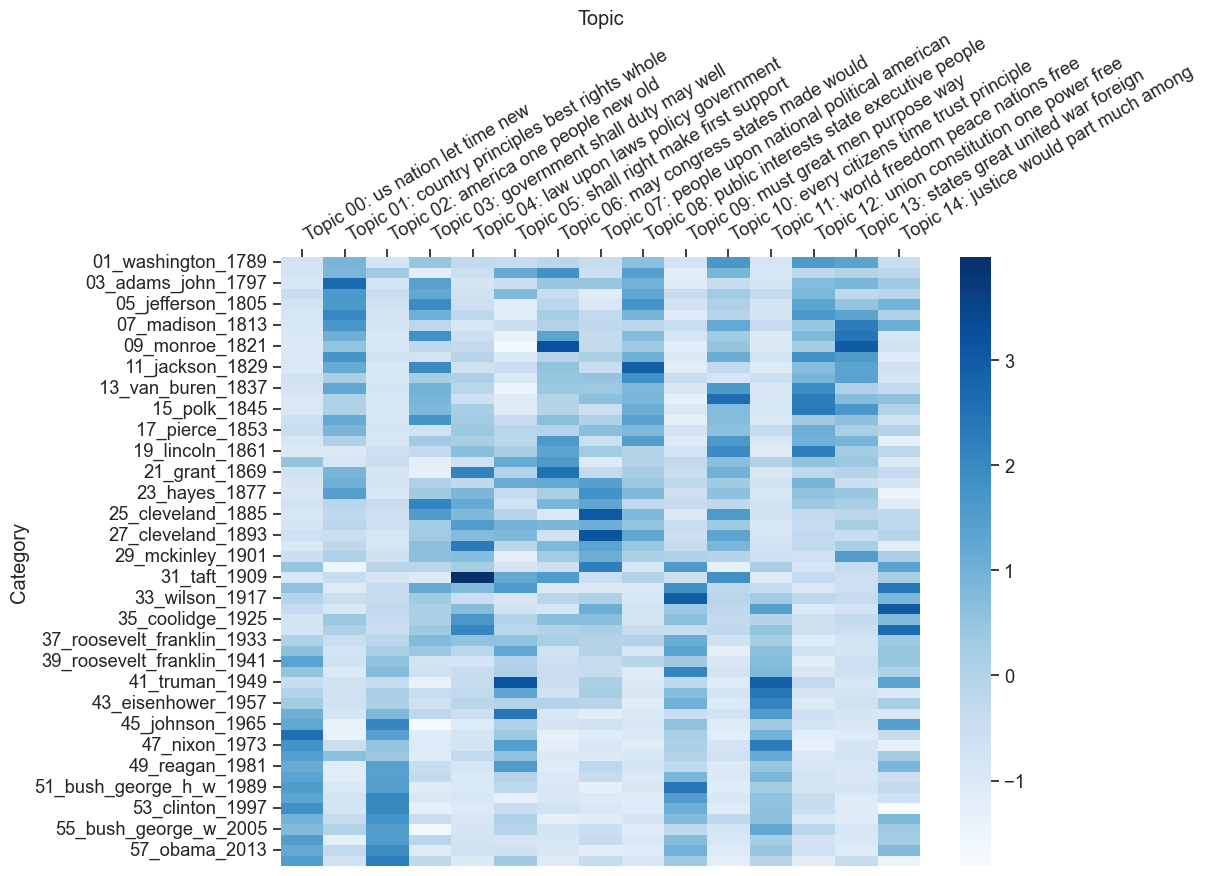

In [52]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(12,9))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous

## Output a CSV File

In [53]:
topic_results = []
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})

df = pd.DataFrame(topic_results)
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
df = df.drop('topic_distribution', axis='columns')

In [54]:
df

,document,Topic 0 us nation let time,Topic 1 country principles best rights,Topic 2 america one people new,Topic 3 government shall duty may,Topic 4 law upon laws policy,Topic 5 shall right make first,Topic 6 may congress states made,Topic 7 people upon national political,Topic 8 public interests state executive,Topic 9 must great men purpose,Topic 10 every citizens time trust,Topic 11 world freedom peace nations,Topic 12 union constitution one power,Topic 13 states great united war,Topic 14 justice would part much
0,13_van_buren_1837,0.027897,0.103885,0.019269,0.096639,0.042884,0.032250,0.081112,0.079623,0.098891,0.033232,0.093574,0.016675,0.153498,0.070009,0.050562
1,47_nixon_1973,0.245224,0.043561,0.125587,0.038102,0.016402,0.114668,0.007550,0.028601,0.001355,0.079770,0.018649,0.232210,0.001768,0.021427,0.025124
2,50_reagan_1985,0.211238,0.020692,0.203209,0.059772,0.006347,0.071531,0.018280,0.048731,0.007904,0.114166,0.011741,0.134888,0.030719,0.015938,0.044843
3,53_clinton_1997,0.250776,0.031590,0.250482,0.030069,0.003695,0.059448,0.031498,0.028113,0.006359,0.122282,0.007189,0.118436,0.043032,0.004883,0.012148
4,17_pierce_1853,0.056596,0.090517,0.013531,0.049731,0.068170,0.069981,0.060831,0.091197,0.097164,0.041531,0.062461,0.052033,0.114405,0.074057,0.057792
5,14_harrison_1841,0.012607,0.061878,0.009882,0.095184,0.022198,0.042999,0.062906,0.089327,0.100264,0.015797,0.123456,0.014390,0.171566,0.103517,0.074030
6,56_obama_2009,0.224673,0.018487,0.213276,0.064896,0.016386,0.048764,0.022673,0.049331,0.015534,0.105922,0.015480,0.094521,0.029518,0.014112,0.066426
7,25_cleveland_1885,0.020497,0.051999,0.034732,0.114564,0.086820,0.070805,0.018935,0.187510,0.099024,0.031594,0.092848,0.029964,0.049441,0.059176,0.052091
8,03_adams_john_1797,0.019159,0.153471,0.019775,0.110443,0.012127,0.058984,0.083375,0.082622,0.106079,0.025696,0.030494,0.020780,0.097197,0.112836,0.066960
9,12_jackson_1833,0.036967,0.065086,0.011498,0.074478,0.053610,0.046276,0.084451,0.084774,0.147805,0.053133,0.017963,0.038317,0.107564,0.141294,0.036785


In [56]:
df.sort_values(by='Topic 3 government shall duty may', ascending=False)[:6]

,document,Topic 0 us nation let time,Topic 1 country principles best rights,Topic 2 america one people new,Topic 3 government shall duty may,Topic 4 law upon laws policy,Topic 5 shall right make first,Topic 6 may congress states made,Topic 7 people upon national political,Topic 8 public interests state executive,Topic 9 must great men purpose,Topic 10 every citizens time trust,Topic 11 world freedom peace nations,Topic 12 union constitution one power,Topic 13 states great united war,Topic 14 justice would part much
32,24_garfield_1881,0.035483,0.054916,0.042236,0.131248,0.104188,0.055207,0.103737,0.116437,0.046218,0.058600,0.035697,0.029728,0.082089,0.074392,0.029824
10,11_jackson_1829,0.012463,0.100098,0.006359,0.126275,0.020462,0.058712,0.088914,0.047100,0.201887,0.021803,0.035015,0.004694,0.096255,0.138366,0.041596
41,05_jefferson_1805,0.031371,0.115047,0.027099,0.125193,0.022853,0.039498,0.055757,0.026342,0.144195,0.042318,0.045484,0.022256,0.125803,0.093229,0.083554
54,08_monroe_1817,0.015134,0.096410,0.003478,0.122025,0.022996,0.034361,0.124957,0.049407,0.093578,0.038722,0.052844,0.007987,0.101435,0.198707,0.037960
40,16_taylor_1849,0.045699,0.100652,0.010079,0.119603,0.062956,0.060879,0.093091,0.065787,0.127456,0.018238,0.064690,0.010247,0.080204,0.098593,0.041826
7,25_cleveland_1885,0.020497,0.051999,0.034732,0.114564,0.086820,0.070805,0.018935,0.187510,0.099024,0.031594,0.092848,0.029964,0.049441,0.059176,0.052091


In [57]:
df.to_csv('Topic-Distributions.csv', encoding='utf-8', index=False)